In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# show data
data=pd.read_csv("ex1data1.txt",header=None,names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#describe data
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


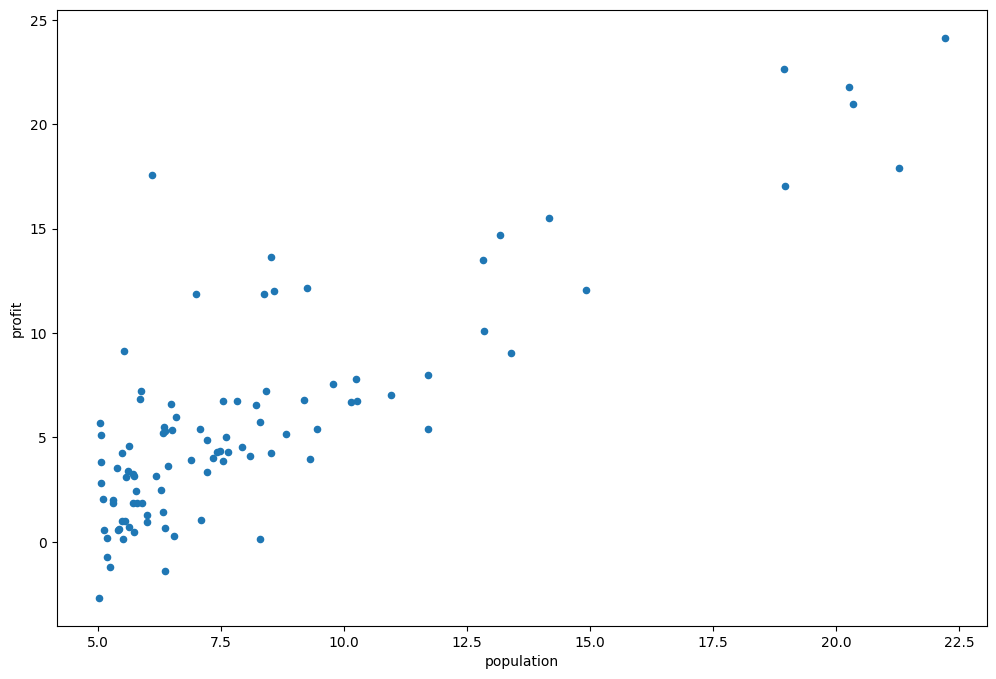

In [4]:
#draw scatter plot of training data
data.plot(kind="scatter",x="population",y="profit",figsize=(12,8))
plt.show()

In [5]:
#clean up dataset
data.insert(0,'ones',1)
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
#convert to matrix
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix([0,0])
theta

matrix([[0, 0]])

In [8]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [9]:
#cost fuction
def computeCost(X,y,theta):
    inner=np.power((X*theta.T)-y,2)
    return np.sum(inner)/(2*len(X))

In [10]:
computeCost(X,y,theta)

32.072733877455676

In [31]:
#use gradient descent to find appropriate θ
def gradientDescent(X,y,theta,iters,alpha):
    parameters=theta.shape[1]
    temp=np.matrix(np.zeros(theta.shape))
    cost=np.zeros(iters)

    for i in range(iters):
        error=X*theta.T-y
        
        for j in range(parameters):
            term=np.multiply(X[:,j],error)
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))

        theta=temp
        cost[i]=computeCost(X,y,theta)
        
    return theta,cost

In [41]:
alpha=0.01
iters=3000

In [43]:
g,cost=gradientDescent(X,y,theta,iters,alpha)
g,cost

(matrix([[-3.87805118,  1.1912525 ]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.4770002 , 4.4770001 ,
        4.47699999]))

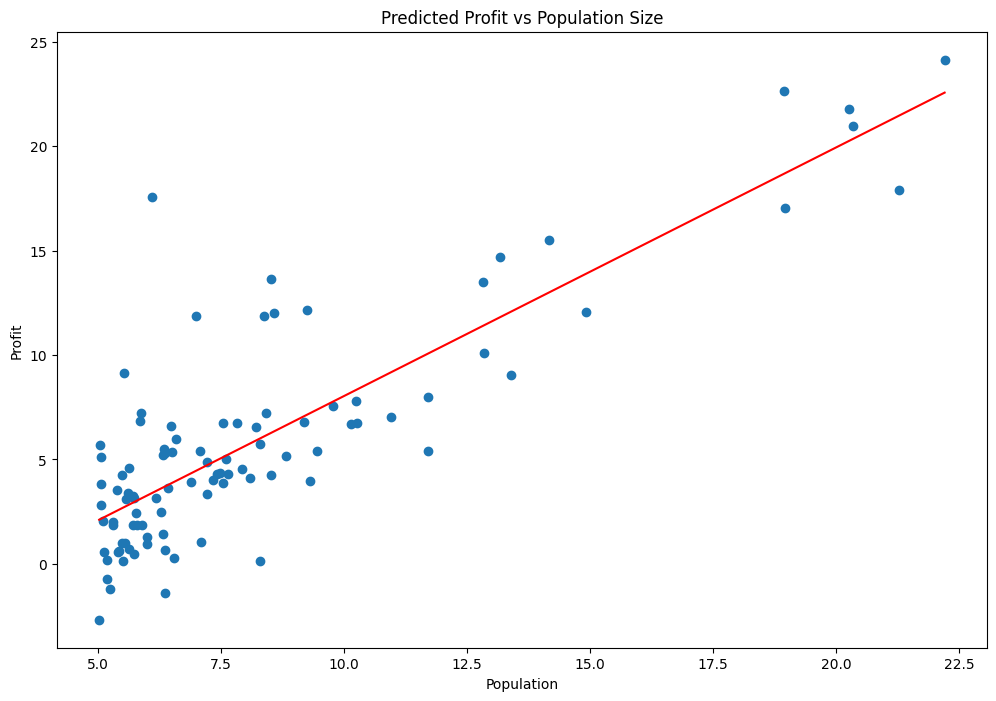

In [53]:
#plot figure
x=np.linspace(data.population.min(),data.population.max(),100)
f=g[0,0]+(g[0,1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,"r",label="Prediction")
ax.scatter(data.population,data.profit,label="training_data")
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs Population Size")
plt.show()